# Prieskumná analýza dát - Exploratory Data Analysis (EDA)

### Dnes sa budeme venovať tomu, ako...
- načítať dáta
- analyzovať jednotlivé atribúty
- analyzovať vzťahy medzi atribútmi
- vizualizovať dáta (vhodné typy vizualizácií, vlastnosti dobrých vizualizácií, ako neklamať vizualizáciou)

### Predtým, ako začneme analyzovať dáta, by sme si mali ujasniť...
- Aké otázky máme analýzou zodpovedať
- Akú úlohu máme riešiť

### Na tomto predmete sa budeme zaoberať ML len dvomi úlohami
- Klasifikácia
- Regresia

### V oboch prípadoch sa snažíme nájsť funkciu $f$ atribútov $X$, ktorá bude predikovať hodnotu závislej premennej $Y$
- V prípade regresie  𝑌∈𝑅
- V prípade klasifikácie  𝑌∈{𝐶1,𝐶2,…,𝐶𝑁}

Obe úlohy sú príkladom **učenia s učiteľom**

# Skúsme načítať data :)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv("data/airbase/BETR8010000800100hour.1-1-1990.31-12-2012")
data.head()

,1990-01-01\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0
0,1990-01-02\t-999.000\t0\t-999.000\t0\t-999.000...
1,1990-01-03\t51.000\t1\t50.000\t1\t47.000\t1\t4...
2,1990-01-04\t-999.000\t0\t-999.000\t0\t-999.000...
3,1990-01-05\t51.000\t1\t51.000\t1\t48.000\t1\t5...
4,1990-01-06\t-999.000\t0\t-999.000\t0\t-999.000...


Vidíme, že pri načítaní nastalo viacero problémov - všetky dáta skončili v jednom stĺpci a navyše prvý riadok bol automaticky interpretovaný ako hlavička.

### Skúsme sa pozrieť na dáta v nejakom editore (konzola) predtým, ako ich načítame

In [3]:
%%bash
head data/airbase/BETR8010000800100hour.1-1-1990.31-12-2012

1990-01-01	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0
1990-01-02	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	48.000	1	-999.000	0	-999.000	0	48.000	1	50.000	1	55.000	1	59.000	1	58.000	1	59.000	1	58.000	1	57.000	1	58.000	1	54.000	1	49.000	1	48.000	1
1990-01-03	51.000	1	50.000	1	47.000	1	48.000	1	51.000	1	52.000	1	58.000	1	57.000	1	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	69.000	1	74.000	1	-999.000	0	-999.000	0	103.000	1	84.000	1	75.000	1	-999.000	0	-999.000	0	-999.000	0
1990-01-04	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	67.000	1	57.000	1	57.000	1	-999.000	0	71.000	1	74.000	1	70.000	1	70.000	1	69.000	1	65.000	1	64

## Teraz už vieme načítať dáta lepšie - pred načítaním dát by sme sa mali sami seba spýtať:

* Odkiaľ sú dané dáta? Kto ich vytvoril?
* V akom formáte sú reprezentované?
* Koľko ich je?
* Je niekde dostupná interpretácia jednotlivých stĺpcov?

In [4]:
filename = "data/airbase/BETR8010000800100hour.1-1-1990.31-12-2012"

data = pd.read_csv(filename, sep='\t', header=None,
                   na_values=[-999, -9999], index_col=0)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1990-01-02,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,1,...,84.0,1,75.0,1,NaN,0,NaN,0,NaN,0
1990-01-04,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


# Môžeme sa pustiť do prieskumnej analýzy (EDA) 

- Opísať dáta spolu s ich charakteristikami = **Deskriptívna štatistika**
- Formulovať a overiť hypotézy o dátach = **Vizualizácia dát** + inferenčná štatistika
- Identifikovať vzťahy medzi atribútmi = **Závislosti** (napr. korelácie)
- Identifikovať problémy v dátach = Čo budeme musieť riešiť v rámci predspracovania

## Možné problémy v dátach

* nevhodná štruktúra dát (dáta nie sú v tabuľkovej podobe alebo jedna entita je opísaná viacerými riadkami tabuľky)
* duplicitné záznamy, resp. nejednoznačné mapovanie medzi záznamami
* nejednotné formáty dát
* chýbajúce hodnoty
* vychýlené (odľahlé) hodnoty (angl. *outliers*)
* a ďalšie

## Iris dataset

iris = kosatec

Tri druhy: setosa, virginica, versicolor
<img src="https://i.imgur.com/PQqYGaW.png" width="70%" />

In [5]:
iris = sns.load_dataset("iris")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.shape[0] - iris.dropna().shape[0]

0

In [7]:
iris[iris.isnull().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species


In [8]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Typy atribútov
* Spojité (numerické)
* Diskrétne (kategorické) - nominálne vs. ordinálne

**Pozor na kategorické atribúty, ktoré sú reprezentované číselne, t. j. čísla len kódujú kategóriu**

### Analýza atribútov po jednom (univariate)

* **spojité** - deskriptívna štatistika (priemer, medián, ...), rozdelenia
* **kategorické** - počet unikátnych hodnôt, frekvencia ich výskytov

### Párová analýza (bivariate)

* **spojitý-spojitý** - závislosť, korelácia
* **spojitý-kategorický** - rozdiely v hodnote spojitého atribútu v závislosti od kategórie
* **kategorický-kategorický** - tabuľka, pomer početnosti hodnôt


In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.describe(exclude=np.number)

,species
count,150
unique,3
top,setosa
freq,50


# Analýza jednotlivých atribútov: Spojité atribúty

Chceme zobraziť, aký je tvar rozdelenia dát, či sa zoskupujú okolo nejakého **centra**, a aká je **rozptýlenosť** hodnôt

## Zobrazenie centrálnosti

* **priemer** (mean)
* **medián** (median, stredná hodnota): hodnota, ktorá rozdeľuje vyššie a nižšie hodnoty
* **modus** (mode, modálna hodnota, najpravdepodobnejšia hodnota): najčastejsia hodnota (hodnota s najväčšou pravdepodobnosťou výskytu)

In [11]:
x = np.array([1000, 1000, 1200, 1100, 10000])
x.mean()

2860.0

In [12]:
np.median(x)

1100.0

In [13]:
stats.mode(x)

/var/folders/pp/2f8702j563b4chlbrnc512_40000gn/T/ipykernel_3100/1654510724.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(x)


ModeResult(mode=array([1000]), count=array([2]))

## Rozptýlenosť

* **variancia** (variance): priemerná kvadratická odchýlka od priemeru 
$$ E[(X-E[X])^2] $$

* **smerodajná odchýlka** (standard deviation): druhá odmocnina variancie, je v jednotkách meranej premennej
$$ s = \sqrt{\frac{1}{N-1}\sum_{i=1}^N{(x_i-\overline{x})^2}} $$ 

* **rozsah** (range): max - min
* **horný/dolný kvartil** (quartile): hodnota, od ktorej je 25%, resp. 75% hodnôt menších 
* **percentil** (percentile): hodnota, od ktorej je XX% hodnôt menších
* **medzikvartilové rozpätie** (inter quartile range): rozdiel medzi 25% a 75% kvartilom, menej náchylné na outlierov ako rozsah



### Na vizualizáciu spojitých premenných používame dva základe typy grafov

* Krabicový graf (boxplot)
* Histogram (graf hustoty)

<AxesSubplot: >

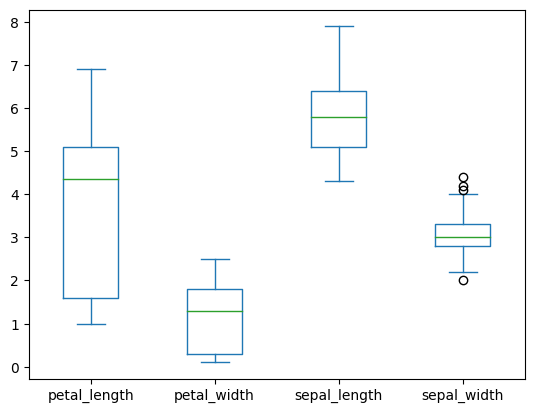

In [14]:
iris[iris.columns.difference(['species'])].plot.box()

## Histogram

- For continuous variables, a **pyplot.hist** or **seaborn.distplot** may be used. 
- For discrete variables, a *seaborn.countplot* is more convenient.

<AxesSubplot: ylabel='Frequency'>

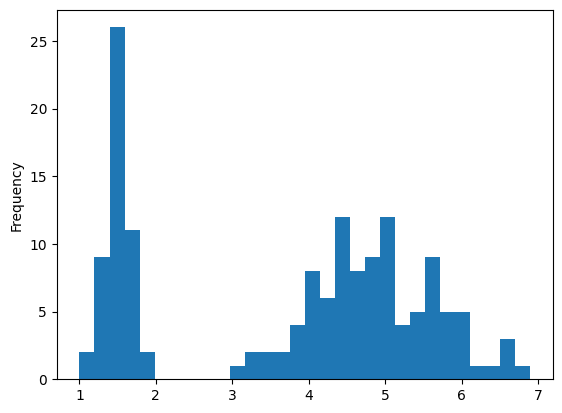

In [15]:
iris.petal_length.plot.hist(bins=30)

## Graf hustoty pravdepodobnostného rozdelenia

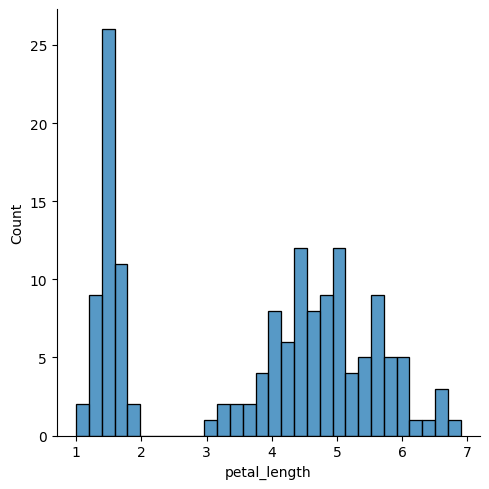

In [16]:
sns.displot(iris.petal_length, bins=30)

## Koeficienty asymetrie a špicatosti

### Koeficient asymetrie (skewness)

Koeficient asymetrie je metrika toho, ako je rozdelenie asymetrické. Úplne symetrické rozdelenie má hodnotu koeficientu rovnú 0. Rozdelenie naklonené doľava bude mať hodnotu koeficientu väčšiu ako 0, naklonené doprava bude mať menej ako 0.

<img src="https://miro.medium.com/max/600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg" alt="Skewness explained" />

So, when is the skewness too much?
* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
* If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
* If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

Text(0.5, 1.0, 'Normalne rozdelenie: Skewness 0.01946')

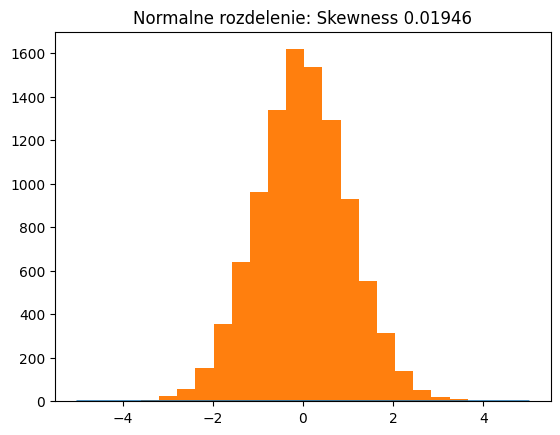

In [17]:
sample_size = 10000

norm = stats.norm(0, 1)
x = np.linspace(-5, 5, 100)
sample = norm.rvs(sample_size)

plt.plot(x, norm.pdf(x))
plt.hist(sample, bins=20)
plt.title("Normalne rozdelenie: ""Skewness %.5f" % (stats.skew(sample), ))

Text(0.5, 1.0, 'Chi-kvadrat(5) rozdelenie: Skewness 1.41531')

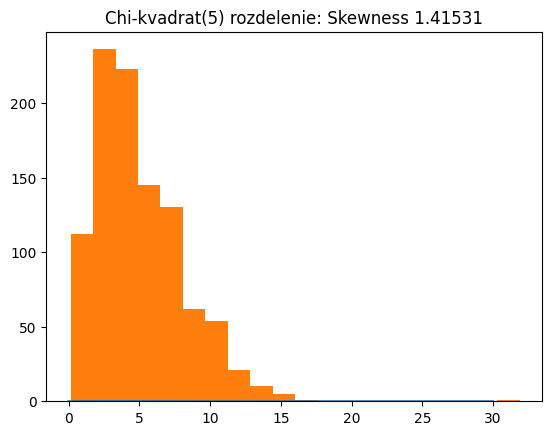

In [18]:
sample_size = 1000

chi2 = stats.chi2(5)
x = np.linspace(0, 30, 100)
sample = chi2.rvs(sample_size)

plt.plot(x, chi2.pdf(x))
plt.hist(sample, bins=20)
plt.title("Chi-kvadrat(5) rozdelenie: ""Skewness %.5f" % (stats.skew(sample)))

Text(0.5, 1.0, '30 - Chi-kvadrat(5) rozdelenie: Skewness -1.08539')

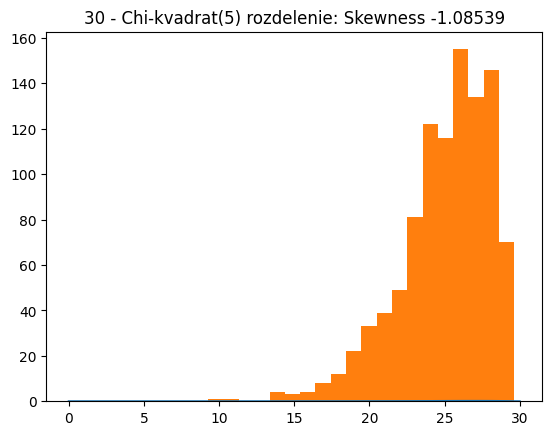

In [19]:
sample_size = 1000

chi2 = stats.chi2(5)
x = np.linspace(0, 30, 100)
sample = 30 - chi2.rvs(sample_size)

plt.plot(x, chi2.pdf(30 - x))
plt.hist(sample, bins=20)
plt.title("30 - Chi-kvadrat(5) rozdelenie: ""Skewness %.5f" % (stats.skew(sample), ))

### Koeficient špicatosti (kurtosis)

- Koeficient špicatosti meria množstvo dát sustredené v chvostoch. Vyjadruje teda množstvo, resp. náchylnosť danej distribúcie produkovať odľahlé (od stredu distribúcie vzdialené) hodnoty.
- Veľmi často sa porovnáva k hodnote koeficientu normálneho rozdelenia, ktorá je 3. 
Ak je to viac ako 3, viac dát je sustredených na okrajoch. Ak menej ako 3, tak je menej dát v okrajoch.
- Často sa používa aj *excess kurtosis*, čo je rozdiel oproti normálnemu rozdeleniu, čize kurtosis - 3.

<img src="https://excelrcom.b-cdn.net/assets/admin/ckfinder/userfiles/images/tableau1/tableau2/tableau3/tableau4/tableau5/tableau6/skewness-kurtosis_1JPG-.jpg" width="50%"/>

Text(0.5, 1.0, 'Normalne rozdelenie: Kurtosis 0.02809')

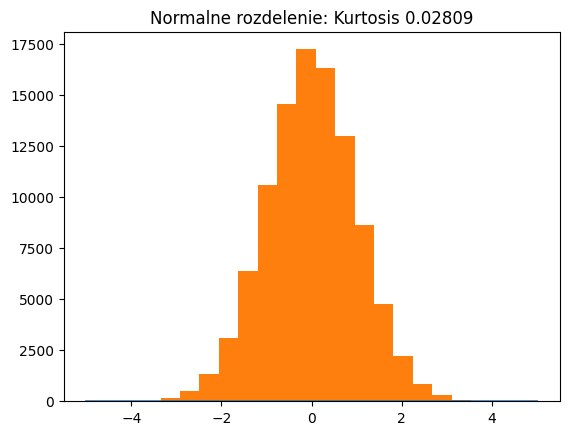

In [20]:
sample_size = 100000

norm = stats.norm(0, 1)
x = np.linspace(-5, 5, 100)
sample = norm.rvs(sample_size)

plt.plot(x, norm.pdf(x))
plt.hist(sample, bins=20)
plt.title("Normalne rozdelenie: ""Kurtosis %.5f" % (stats.kurtosis(sample), ))

V základnom nastavení vracia funkcia excess kurtosis.

Text(0.5, 1.0, 'Normalne rozdelenie: Kurtosis 2.98024')

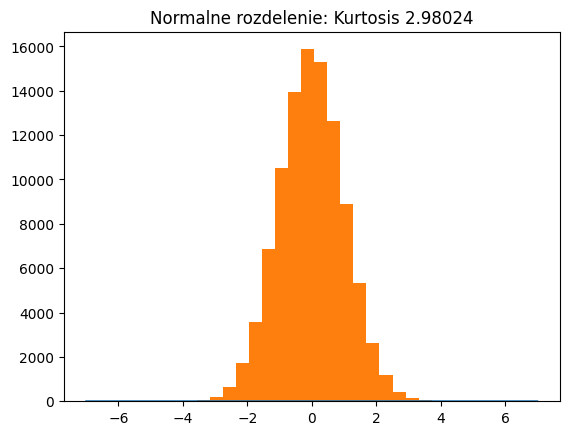

In [21]:
sample_size = 100000

norm = stats.norm(0,1)
x = np.linspace(-7, 7, 100)
sample = norm.rvs(sample_size)

plt.plot(x, norm.pdf(x))
plt.hist(sample, bins=20)
plt.title("Normalne rozdelenie: ""Kurtosis %.5f" % (stats.kurtosis(sample, fisher=False), ))
# musime prestavit parameter fisher na False

Text(0.5, 1.0, 'Logisticke rozdelenie: Kurtosis 3.96065')

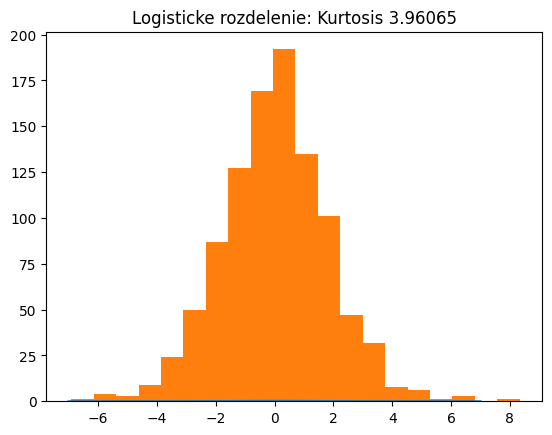

In [22]:
sample_size = 1000

logistic = stats.logistic()
x = np.linspace(-7, 7, 100)
sample = logistic.rvs(sample_size)

plt.plot(x, logistic.pdf(x))
plt.hist(sample, bins=20)

plt.title("Logisticke rozdelenie: ""Kurtosis %.5f" % (stats.kurtosis(sample, fisher=False)))

Text(0.5, 1.0, 'Uniformne rozdelenie: Kurtosis 1.81885')

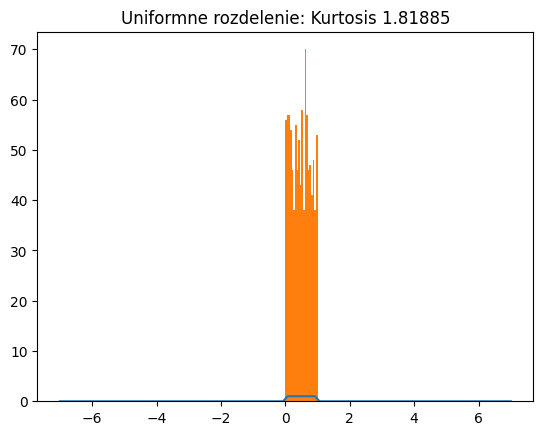

In [23]:
sample_size = 1000

uniform = stats.uniform()
x = np.linspace(-7, 7, 100)
sample = uniform.rvs(sample_size)

plt.plot(x, uniform.pdf(x))
plt.hist(sample, bins=20)

plt.title("Uniformne rozdelenie: ""Kurtosis %.5f" % (stats.kurtosis(sample, fisher=False)))

## Analýza po jednom: Kategorické atribúty

Najčastejším spôsobom zobrazenia je frekvenčná tabuľka zobrazujúca buď počty pozorovaní pre jednotlivé unikátne hodnoty atribútu alebo pomer voči celkovému počtu pozorovaní. 

Na grafickú vizualizáciu sa používa **stĺpcový graf (bar plot)**.

In [24]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

<AxesSubplot: >

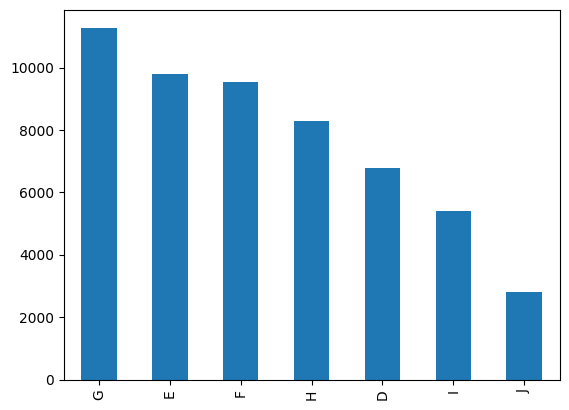

In [26]:
diamonds.color.value_counts().plot(kind='bar')

### Kedy je vhodné použiť stĺpcový, a kedy koláčový graf? Aké sú ich výhody a nevýhody?

<AxesSubplot: ylabel='color'>

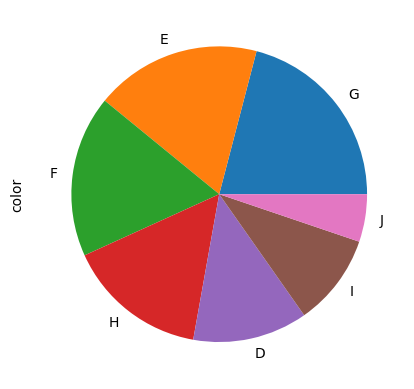

In [27]:
diamonds.color.value_counts().plot(kind='pie')

Pri počte hodnôt väčšom ako 3-4 je lepšie použiť stĺpcový graf.

## Párová analýza

### Spojitý - spojitý: Scatter plot

Najčastejší spôsob ako vizualizovať vzťah dvoch spojitých atribútov.

Zobrazuje rozmiestnenie v priestore hodnôt. Umožňuje zistiť, či sú v dátach nejaké prirodzené zhluky.

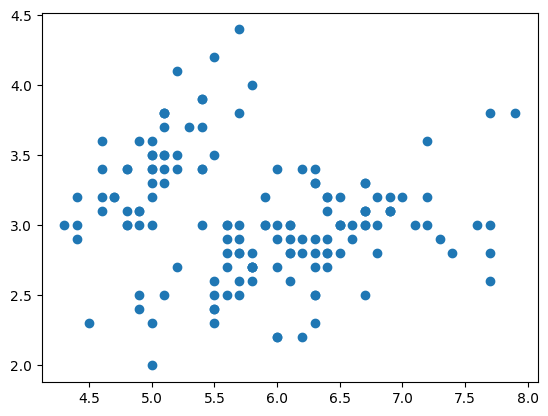

In [28]:
plt.scatter(iris.sepal_length, iris.sepal_width)

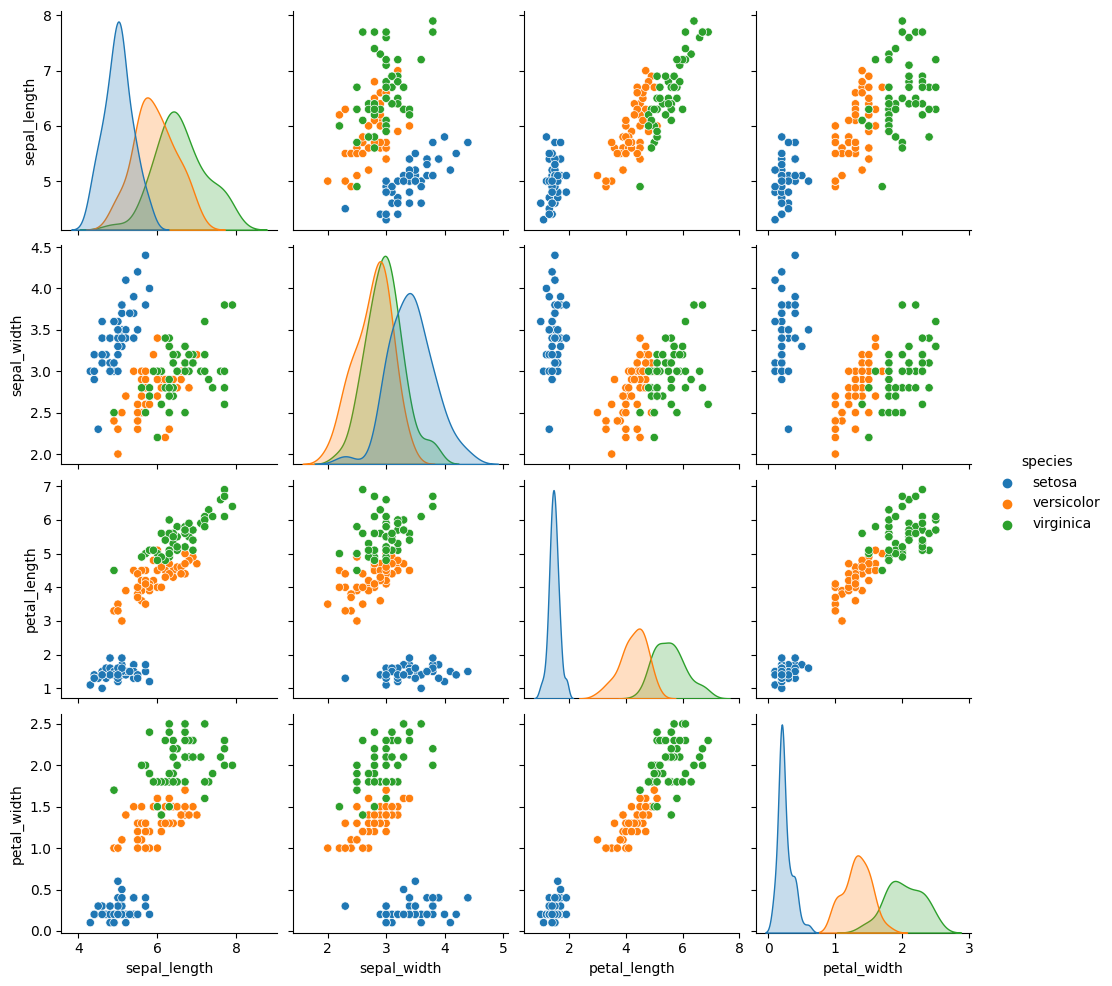

In [29]:
sns.pairplot(iris, hue="species")

## Korelácia

Hodnota v rozsahu [-1, 1], ktorá hovorí o tom, aký silný lineárny vzťah je medzi atribútmi.

* -1 perfektná negatívna korelácia
* 0 žiadna korelácia
* 1 perfektná kladná korelácia

Pearsonov korelačný koeficient:
$$ corr(X, Y) = \frac{cov(X,Y)}{\sigma_X\sigma_Y} = \frac{E[(X-E[X])(Y-E[Y])]}{\sigma_X\sigma_Y}$$

$$ r_{xy} = \frac{\sum_{i=1}^{n}{(x_i-\overline{x})(y_i-\overline{y})}}{(n-1)s_xs_y} $$

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Data_exploration_4.png" width="50%"/>

### Pearsonov korelačný koeficient meria **lineárnu závislosť** medzi dvomi premennými.

Medzi dvomi premennými však môže byť aj iný typ závislosti.

Alternatívy k Pearsonovmu korelačnému koeficientu, ktoré nevyžadujú linearitu, len monotónnosť, sú:
* Spearmanov koeficient
* Kendalovo $\tau$

Pearson correlation: 0.963


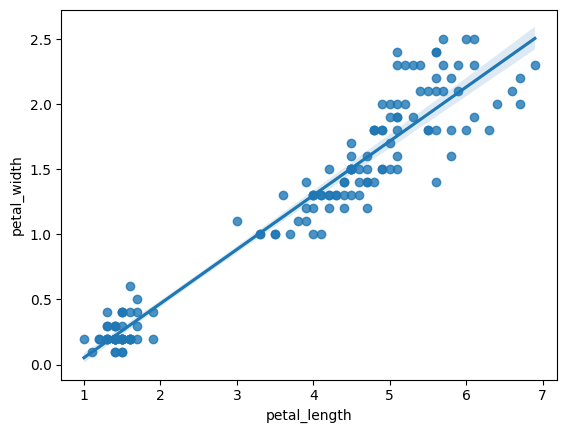

In [30]:
sns.regplot(x="petal_length", y="petal_width", data=iris)
print("Pearson correlation: %.3f" % iris.petal_length.corr(iris.petal_width))

In [31]:
iris.corr()

/var/folders/pp/2f8702j563b4chlbrnc512_40000gn/T/ipykernel_3100/2141086772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


/var/folders/pp/2f8702j563b4chlbrnc512_40000gn/T/ipykernel_3100/3991626348.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), ax=ax, annot=True, fmt=".3f")


<AxesSubplot: >

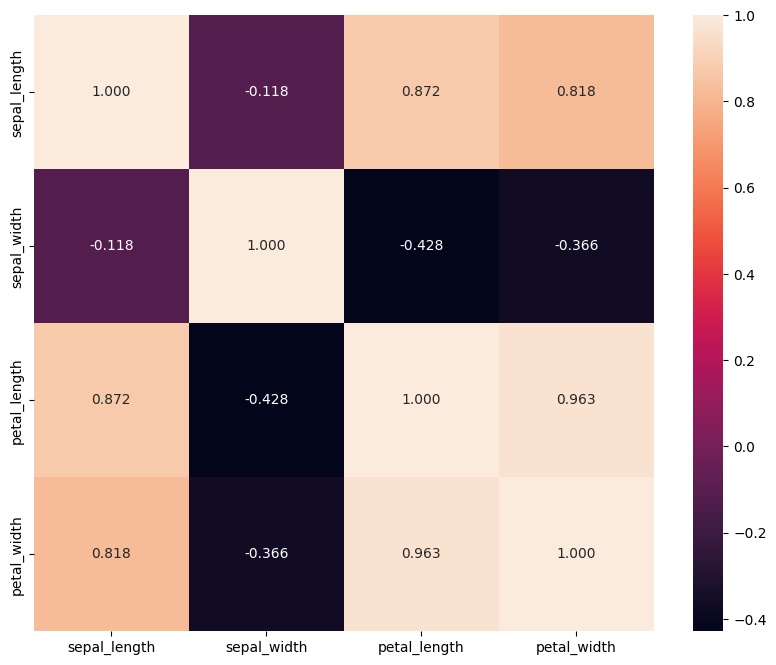

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(iris.corr(), ax=ax, annot=True, fmt=".3f")

## Korelácia $\neq$ kauzalita

- Ak dva javy spolu korelujú, môže to byť náhoda. (*Príklady vtipných korelácií nájdete tu:* http://tylervigen.com/spurious-correlations)
- Alebo môže existovať nejaký iný jav, ktorý je pôvodcom oboch. (*Napr. účasť študentov na prednáškach môže korelovať s ich finálnym hodnotením na predmete, ale možno len na prednášky chodí viac snaživejších študentov, ktorí by lepšie hodnotenie mali tak či tak.*)
- **Dokázať kauzalitu je netriviálne - kontrolovaný (randomizovaný) experiment**

## Párová analýza: Spojitý - kategorický

Tu sa najčastejšie používa rozdeľovanie pozorovaní podľa kategorickej hodnoty a zobrazovanie rozdelení podmnožín numerických hodnôt napríklad pomocou histogramov alebo boxplotov.

Čize ide o viacnásobné použitie vizualizácií, ktoré sa použivajú na zobrazenie spojitých atribútov.

<AxesSubplot: xlabel='species', ylabel='petal_length'>

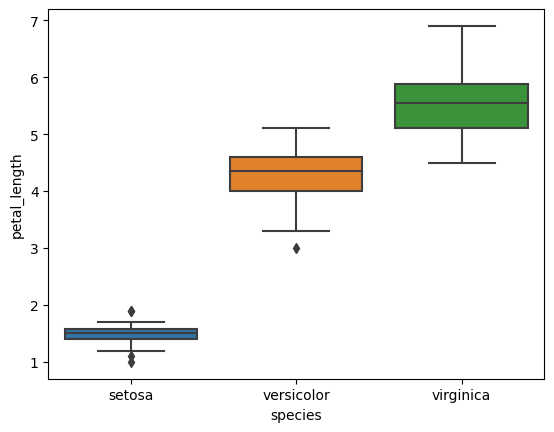

In [33]:
sns.boxplot(x='species', y='petal_length', data=iris)

## Párová analýza: Kategorický - kategorický

* Kontingenčná tabuľka
* Teplotná mapa
* Zložený stĺpcový graf
* Chi-kvadrát testy

In [34]:
titanic = pd.read_csv('data/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
# Frekvencna tabulka
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [36]:
survived_class = pd.crosstab(index=titanic["Survived"], 
                             columns=titanic["Pclass"])
survived_class.index= ["died","survived"]
survived_class

Pclass,1,2,3
died,80,97,372
survived,136,87,119


<AxesSubplot: xlabel='Pclass'>

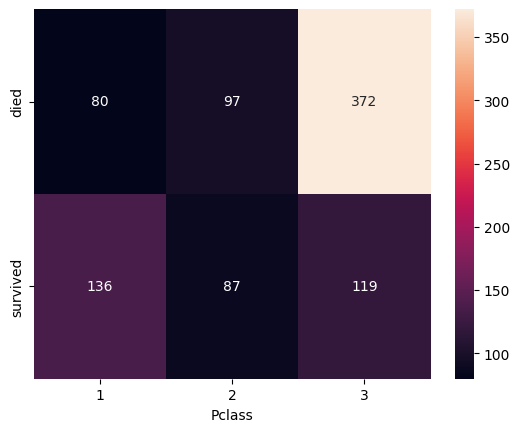

In [37]:
sns.heatmap(survived_class, annot=True, fmt="d")

Pclass,1,2,3
died,0.37037,0.527174,0.757637
survived,0.62963,0.472826,0.242363


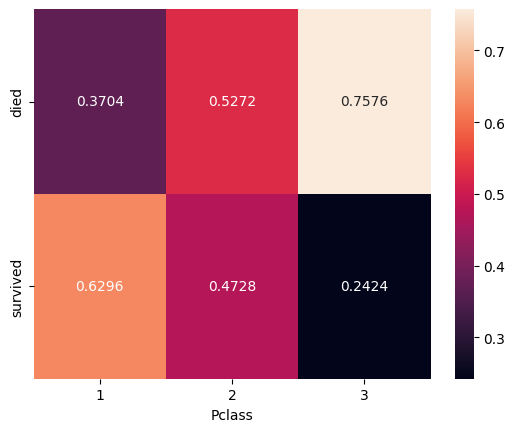

In [38]:
survived_class_perc = pd.crosstab(index=titanic["Survived"], 
                                  columns=titanic["Pclass"],
                                  normalize='columns') #'index', 'all'
survived_class_perc.index= ["died","survived"]

sns.heatmap(survived_class_perc, 
            annot=True, 
            fmt=".4f")
survived_class_perc

In [39]:
pd.crosstab(index=titanic["Survived"], 
            columns=[titanic["Pclass"], 
            titanic["Sex"]],
            margins=True)

Pclass        1           2           3       All
Sex      female male female male female male     
Survived                                         
0             3   77      6   91     72  300  549
1            91   45     70   17     72   47  342
All          94  122     76  108    144  347  891

<AxesSubplot: xlabel='Pclass'>

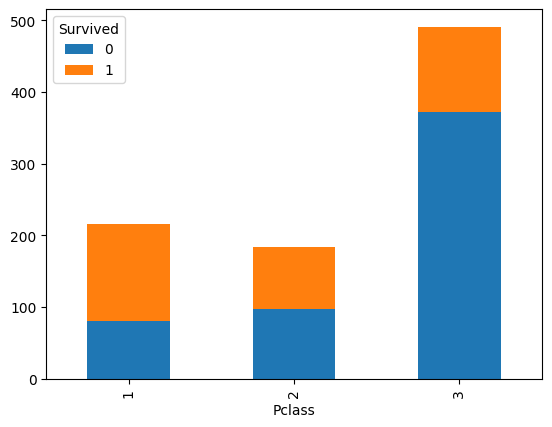

In [40]:
pd.crosstab(index=titanic["Pclass"], columns=titanic["Survived"]).plot.bar(stacked=True)

# Vizualizácie nám pomáhajú pochopiť dáta
**Ak sú spravené dobre...**

